Bauyrzhan Zhakenov

Assignment 3 + Assignment 4 + TSIS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Exercise 1: One-hot Encoding and TF-IDF

One-Hot Encoded Table:
            x0_and  x0_are  x0_cat  x0_cats  x0_dog  x0_dogs  x0_great  \
Sentence 1     0.0     0.0     1.0      0.0     0.0      0.0       0.0   
Sentence 2     0.0     0.0     0.0      0.0     1.0      0.0       0.0   
Sentence 3     1.0     1.0     0.0      1.0     0.0      1.0       1.0   

            x0_log  x0_mat  x0_on  x0_pets  x0_sat  x0_the  
Sentence 1     0.0     1.0    1.0      0.0     1.0     2.0  
Sentence 2     1.0     0.0    1.0      0.0     1.0     2.0  
Sentence 3     0.0     0.0    0.0      1.0     0.0     0.0  


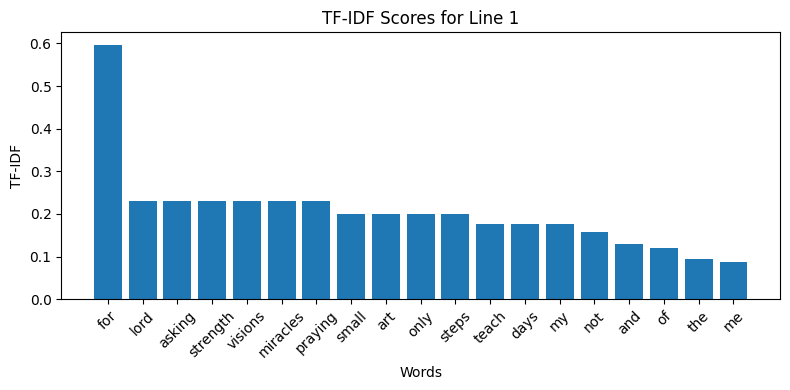

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

sentences = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "cats and dogs are great pets"
]

words_list = [sentence.lower().split() for sentence in sentences]
flat_words = [[word] for sentence in words_list for word in sentence]

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(flat_words)

encoded_sentences = []
for sentence in words_list:
    word_vectors = encoder.transform([[word] for word in sentence])
    encoded_sentence = word_vectors.sum(axis=0)
    encoded_sentences.append(encoded_sentence)

onehot_df = pd.DataFrame(encoded_sentences, columns=encoder.get_feature_names_out())
onehot_df.index = [f"Sentence {i+1}" for i in range(len(sentences))]
print("One-Hot Encoded Table:")
print(onehot_df)

with open("/content/drive/MyDrive/exupery/prayer.txt", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f.readlines() if line.strip()]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(lines)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.index = [f"Line {i+1}" for i in range(len(lines))]

line_index = 0
line_tfidf = tfidf_df.iloc[line_index]
line_tfidf = line_tfidf[line_tfidf > 0].sort_values(ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(line_tfidf.index, line_tfidf.values)
plt.title(f"TF-IDF Scores for Line {line_index + 1}")
plt.xlabel("Words")
plt.ylabel("TF-IDF")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Exercise 2: Word2Vec (CBOW, Skip-gram)

In [8]:
%pip install --force-reinstall --no-cache-dir --quiet gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 286.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 234.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 284.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 247.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 296.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [2]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim.downloader as api
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

file_path = '/content/drive/MyDrive/exupery/prayer.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    sample_text = file.read()
cleaned_text = clean_text(sample_text)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

processed_tokens = preprocess_text(cleaned_text)
print(processed_tokens[:10])

['lord', 'im', 'praying', 'miracle', 'vision', 'im', 'asking', 'strength', 'day', 'teach']


In [ ]:
from gensim.models import Word2Vec

sentences = [preprocess_text(sentence) for sentence in nltk.sent_tokenize(cleaned_text)]

w2v_cbow = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)
w2v_skipgram = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

vector_cbow = w2v_cbow.wv['asking']
vector_skip = w2v_skipgram.wv['asking']
print(vector_cbow[:5], vector_skip[:5])

[-0.00777292 -0.00674447 -0.0031593   0.00660737 -0.00081834] [-0.00775658 -0.00664306 -0.00320052  0.00654868 -0.00075209]


In [ ]:
vocab_cbow = list(w2v_cbow.wv.index_to_key)
vectors_cbow = np.array([w2v_cbow.wv[word] for word in vocab_cbow])
cbow_tsne = TSNE(n_components=2, random_state=42).fit_transform(vectors_cbow)

vocab_sg = list(w2v_skipgram.wv.index_to_key)
vectors_sg = np.array([w2v_skipgram.wv[word] for word in vocab_sg])
sg_tsne = TSNE(n_components=2, random_state=42).fit_transform(vectors_sg)

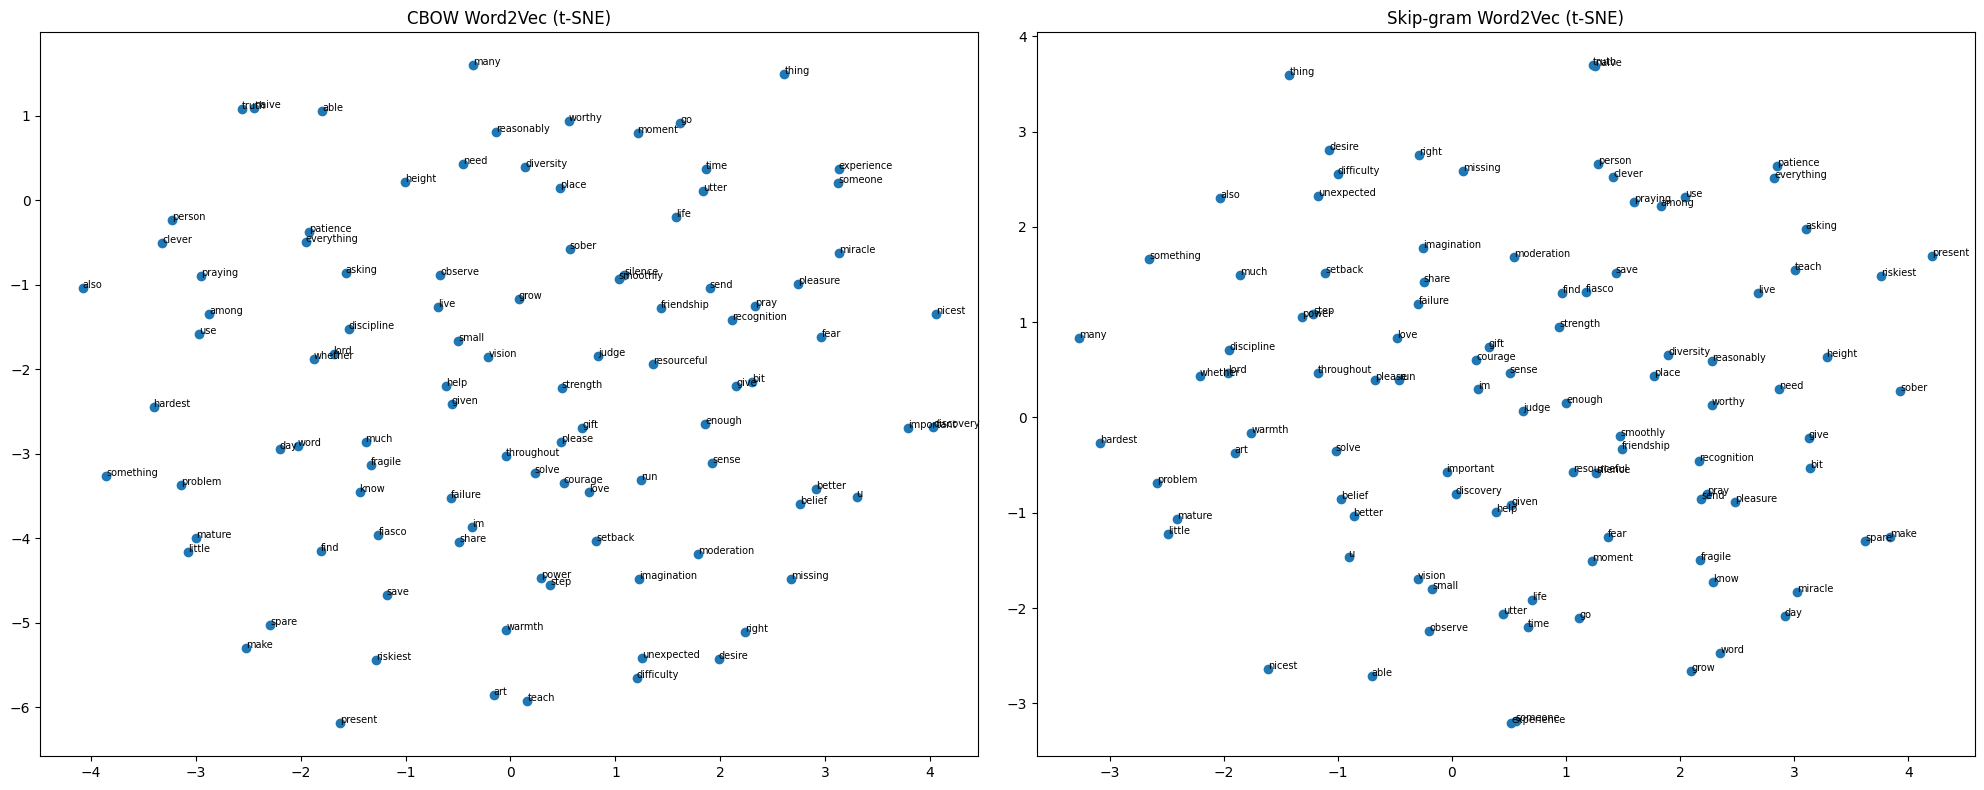

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].scatter(cbow_tsne[:, 0], cbow_tsne[:, 1])
for i, word in enumerate(vocab_cbow[:200]):
    ax[0].annotate(word, (cbow_tsne[i, 0], cbow_tsne[i, 1]), fontsize=7)
ax[0].set_title('CBOW Word2Vec (t-SNE)')

ax[1].scatter(sg_tsne[:, 0], sg_tsne[:, 1])
for i, word in enumerate(vocab_sg[:200]):
    ax[1].annotate(word, (sg_tsne[i, 0], sg_tsne[i, 1]), fontsize=7)
ax[1].set_title('Skip-gram Word2Vec (t-SNE)')

plt.tight_layout()
plt.show()

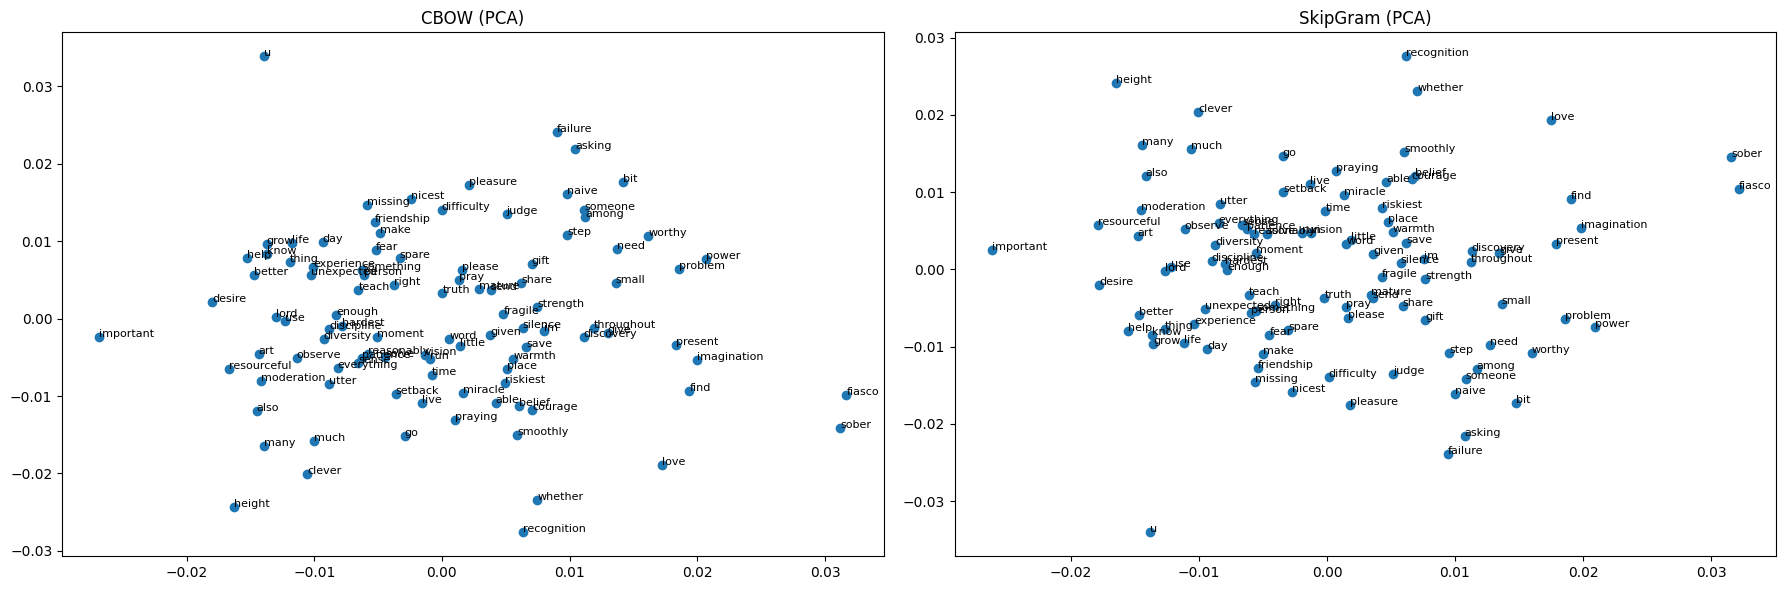

In [ ]:
pca = PCA(n_components=2)

cbow_pca = pca.fit_transform(vectors_cbow)
sg_pca = pca.fit_transform(vectors_sg)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].scatter(cbow_pca[:, 0], cbow_pca[:, 1])
for i, word in enumerate(vocab):
    ax[0].annotate(word, (cbow_pca[i, 0], cbow_pca[i, 1]), fontsize=8)
ax[0].set_title('CBOW (PCA)')

ax[1].scatter(sg_pca[:, 0], sg_pca[:, 1])
for i, word in enumerate(vocab):
    ax[1].annotate(word, (sg_pca[i, 0], sg_pca[i, 1]), fontsize=8)
ax[1].set_title('SkipGram (PCA)')

plt.tight_layout()
plt.show()


Word: creature
CBOW don't have
SkipGram don't have
FastText : [('make', 0.11812344193458557), ('me', 0.11329354345798492), ('for', 0.0665566623210907), ('right', 0.05885377898812294), ('to', 0.035869013518095016), ('days', 0.019252102822065353), ('my', -0.017363715916872025), ('of', -0.022403070703148842), ('life', -0.025230109691619873), ('that', -0.02860724925994873)]

Word: god
CBOW don't have
SkipGram don't have
FastText : [('of', 0.3030044734477997), ('give', 0.20712177455425262), ('not', 0.09220172464847565), ('life', 0.0889328345656395), ('that', 0.008906804956495762), ('for', 0.003915674984455109), ('make', -0.018525706604123116), ('to', -0.01982424408197403), ('with', -0.03151348605751991), ('and', -0.04334595799446106)]

Word: lord
CBOW don't have
SkipGram don't have
FastText : [('days', 0.20027825236320496), ('with', 0.128400057554245), ('that', 0.12014874070882797), ('the', 0.11120980232954025), ('life', 0.07182258367538452), ('teach', 0.05607185140252113), ('for', 0.02712

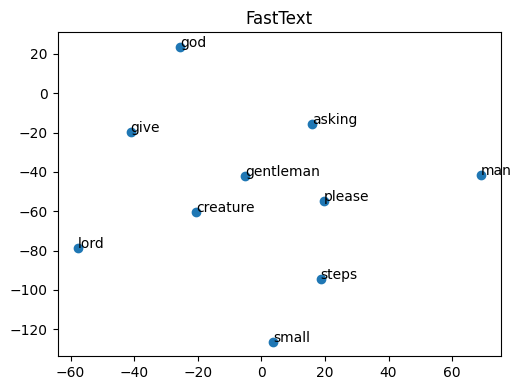

In [15]:
file_path = '/content/drive/MyDrive/exupery/prayer.txt'
with open(file_path, 'r', encoding='utf-8') as f:
    raw_text = f.read()


sentences = sent_tokenize(raw_text)
corpus = [simple_preprocess(sent) for sent in sentences if sent.strip()]

from gensim.models import Word2Vec, FastText

cbow_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=3, sg=0)
skipgram_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=3, sg=1)
fasttext_model = FastText(sentences=corpus, vector_size=100, window=5, min_count=3)

words_to_test = ["creature", "god", "lord", "asking", "steps", "gentleman", "small", "please", "give", "man"]

def show_neighbors(word):
    print(f"\nWord: {word}")
    try:
        print("CBOW     :", cbow_model.wv.most_similar(word))
    except:
        print("CBOW don't have")
    try:
        print("SkipGram :", skipgram_model.wv.most_similar(word))
    except:
        print("SkipGram don't have")
    print("FastText :", fasttext_model.wv.most_similar(word))

for w in words_to_test:
    show_neighbors(w)


def visualize_words(words, models_dict):
    plt.figure(figsize=(15, 4))
    for i, (label, model) in enumerate(models_dict.items()):
        vectors = [model.wv[word] for word in words if word in model.wv]
        filtered_words = [word for word in words if word in model.wv]

        if len(vectors) < 2:
            print(f"Not enough words to plot for {label}. Skipping.")
            continue

        tsne = TSNE(n_components=2, perplexity=max(2, len(vectors) // 3), random_state=42)
        reduced = tsne.fit_transform(np.array(vectors))

        plt.subplot(1, 3, i+1)
        plt.title(label)
        plt.scatter(reduced[:, 0], reduced[:, 1])
        for word, (x, y) in zip(filtered_words, reduced):
            plt.text(x, y, word)
    plt.tight_layout()
    plt.show()

visualize_words(words_to_test, {
    "CBOW": cbow_model,
    "SkipGram": skipgram_model,
    "FastText": fasttext_model
})



Exercise 4: Understanding RNNs and the Vanishing Gradient Problem

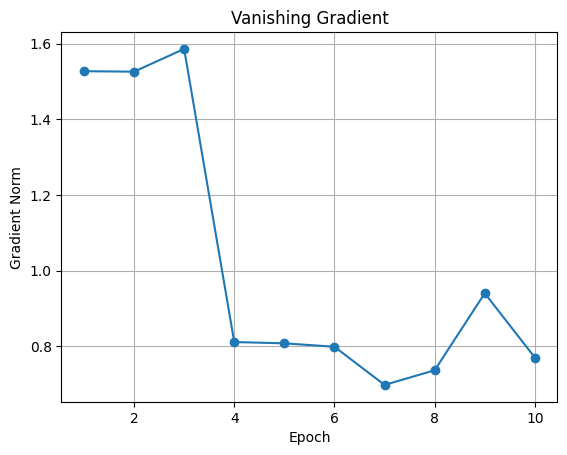

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), _ = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
y_train = to_categorical(y_train, num_classes=10)

x_train = x_train[:1000]
y_train = y_train[:1000]

sample_x = tf.convert_to_tensor(x_train[42:43])
sample_y = tf.convert_to_tensor(y_train[42:43])

inputs = tf.keras.Input(shape=(28, 28))
rnn_out = tf.keras.layers.SimpleRNN(64, return_sequences=True)(inputs)
final_out = tf.keras.layers.Dense(10, activation='softmax')(rnn_out[:, -1])
model = tf.keras.Model(inputs, final_out)

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.CategoricalCrossentropy()

total_grad_norms = []
num_epochs = 10

for epoch in range(num_epochs):
    model.compile(optimizer=optimizer, loss=loss_fn)
    model.fit(x_train, y_train, epochs=1, batch_size=128, verbose=0)

    with tf.GradientTape() as tape:
        tape.watch(sample_x)
        rnn_out = model.layers[1](sample_x)
        output = model.layers[2](rnn_out[:, -1])
        loss = loss_fn(sample_y, output)

    grads = tape.gradient(loss, sample_x)[0].numpy()
    total_norm = np.linalg.norm(grads)
    total_grad_norms.append(total_norm)

plt.plot(range(1, num_epochs + 1), total_grad_norms, marker='o')
plt.title("Vanishing Gradient")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.show()



Exercise 5: Applications in Text Classification and Sequence Modeling

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 135ms/step - accuracy: 0.5163 - loss: 0.6943
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 107ms/step - accuracy: 0.6770 - loss: 0.6098
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.7613 - loss: 0.4920
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.8164 - loss: 0.4059
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.8270 - loss: 0.3871
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.8366 - loss: 0.3694
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.8281 - loss: 0.3780
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.7956 - loss: 0.4299
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.8709 - loss: 0.2999
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.8693 - loss: 0.3074
Vanilla_RNN - loss, accuracy [0.712166428565979, 0.5972399711608887]


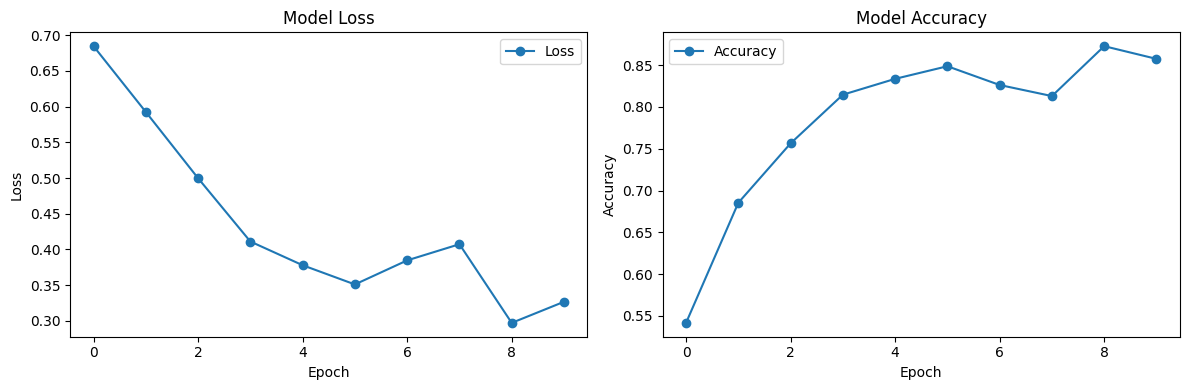

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
import numpy as np


vocab_size = 10000
max_len = 200
em_len = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

RNN_model = Sequential(name="Vanilla_RNN")
RNN_model.add(Embedding(vocab_size,
                        em_len,
                        input_length=max_len))
RNN_model.add(SimpleRNN(128,
                        activation='tanh',
                        return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))


RNN_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

history = RNN_model.fit(x_train, y_train,
                        batch_size=64,
                        epochs=10,
                        verbose=1)

print("Vanilla_RNN - loss, accuracy", RNN_model.evaluate(x_test, y_test, verbose=0))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], marker='o', label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], marker='o', label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

 Implementing LSTMs for Text Generation and Classification

In [2]:
model_textgen_lstm = Sequential()
model_textgen_lstm.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model_textgen_lstm.add(LSTM(100))
model_textgen_lstm.add(Dense(total_words, activation='softmax'))

model_textgen_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_textgen_lstm.fit(X, y, epochs=100, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 0.0659 - loss: 6.8668
Epoch 2/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.1144 - loss: 5.9665
Epoch 3/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.1415 - loss: 5.5548
Epoch 4/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.1580 - loss: 5.2316
Epoch 5/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.1740 - loss: 4.9495
Epoch 6/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.1878 - loss: 4.6924
Epoch 7/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.1984 - loss: 4.4733
Epoch 8/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.2195 - loss: 4.2284
Epoch 9/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.2398 - loss: 4.0219
Epoch 10/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.2598 - loss: 3.8187
Epoch 11/100
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.2870 - loss: 3.60

In [8]:
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model_textgen_lstm.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

generated = generate_text("I received the impression", 25, max_sequence_len)
print("\nI received the impression - ", generated)

generated = generate_text("Victor", 15, max_sequence_len)
print("\nVictor - ", generated)

generated = generate_text("Few days after", 20, max_sequence_len)
print("\nFew days after - ", generated)

generated = generate_text("In our century", 10, max_sequence_len)
print("\nIn our century - ", generated)


I received the impression -  I received the impression in a singular and avoided with earth to an expression of my friends i might be supposed your one dear hours to me out in

Victor -  Victor when she died nay then i was not miserable a task yet to one another

Few days after -  Few days after this time greatly bitterly to the dæmon caroline made my by the expression of my heart he called up my

In our century -  In our century than period with feelings which loved the trees sank and


Improving Performance with Bidirectional LSTMs

In [4]:
from tensorflow.keras.layers import Bidirectional

model_textgen_bilstm = Sequential()
model_textgen_bilstm.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model_textgen_bilstm.add(Bidirectional(LSTM(100)))
model_textgen_bilstm.add(Dense(total_words, activation='softmax'))

model_textgen_bilstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_textgen_bilstm.fit(X, y, epochs=50, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.0665 - loss: 6.8093
Epoch 2/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.1198 - loss: 5.9310
Epoch 3/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.1479 - loss: 5.5161
Epoch 4/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.1672 - loss: 5.2041
Epoch 5/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.1757 - loss: 4.9371
Epoch 6/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.1924 - loss: 4.6692
Epoch 7/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.2057 - loss: 4.4332
Epoch 8/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.2234 - loss: 4.1995
Epoch 9/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.2415 - loss: 3.9871
Epoch 10/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.2640 - loss: 3.7852
Epoch 11/50
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.2911 - loss: 3.5952
Epoch 12